# 2) IACOV - Model Development for Prognosis - ICU
## Strategy 3) Training on hospitals of same region and testing on 30% of a specific hospital

Code below to import libraries when running this point forward

In [ ]:
# !pip install npm nodejs

In [ ]:
# !jupyter lab clean
# !jupyter lab build

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

C:\Users\carin\AppData\Local\Temp\ipykernel_8532\2017038996.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### This code uses just 14 hospitals, since ICU or MV has no variation for 4 hospitals
#### - The code that prepares the data to run all strategies for ICU and MV is: PREPARING_DATA_TO_UCI_MV_ANALYSES
#### - df_iacov_en.csv (used for death) was replaced here by df_iacov_model_lean_14hosp.csv
#### - put df_iacov_model_lean_14hosp.csv in same folder as this notebook

In [2]:
#Put csv in same folder as this notebook
dataset = pd.read_csv("df_iacov_model_lean_14hosp.csv", delimiter=";")
df_iacov_model = pd.DataFrame(dataset)
df_iacov_model.shape

(6046, 30)

In [3]:
df_iacov_model.columns

Index(['city_hospital', 'age', 'male', 'race', 'heart_rate', 'resp_rate',
       'sys_press', 'dias_press', 'mean_press', 'temp', 'hemoglobin',
       'platelets', 'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv',
       'leukocytes', 'neutrophil', 'lymphocytes', 'basophils', 'eosinophils',
       'monocytes', 'crp', 'death', 'icu', 'mv', 'state', 'region', 'excluir'],
      dtype='object')

## 2.1) Assign binary outcome ICU to be predicted

### 2.1.1) Maintain essential variables (LEAN Model)

In [4]:
#22 predictors + outcome + Region/State
df_iacov_model_lean = df_iacov_model[['city_hospital'
                                      ,'age'
                                      ,'male'
                                      ,'heart_rate'
                                      ,'resp_rate'
                                      ,'sys_press'
                                      ,'dias_press'
                                      ,'mean_press'
                                      ,'temp'
                                      ,'hemoglobin'
                                      ,'platelets'
                                      ,'hematocrit'
                                      ,'red_cells_count'
                                      ,'hcm'
                                      ,'rdw'
                                      ,'mcv'
                                      ,'leukocytes'
                                      ,'neutrophil'
                                      ,'lymphocytes'
                                      ,'basophils'
                                      ,'eosinophils'
                                      ,'monocytes'
                                      ,'crp'
                                      ,'icu'
                                      ,'region' #for filtering purposes
                                      ,'state' #for filtering purposes
                                     ]]
df_iacov_model_lean.shape

(6046, 26)

In [5]:
df_iacov_model_lean.to_csv('df_iacov_model_lean.csv', sep=';', index=False)

### 2.1.2) Filter a specific hospital

In [6]:
#Put csv in same folder as this notebook
df_all_hospitals = pd.read_csv("df_iacov_model_lean.csv", delimiter=";", decimal=".")
df_all_hospitals.shape

(6046, 26)

In [7]:
column_summaries(df_all_hospitals)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,14,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0,0.000,98,0,float64,-0.060,6046.000,57.521,17.869,18.000,44.000,58.000,71.000,105.000
male,0,0.000,2,2790,float64,-0.155,6046.000,0.539,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,809,13.381,183,0,float64,0.611,5237.000,85.689,17.209,13.000,75.000,85.000,96.000,233.000
resp_rate,1457,24.099,69,1,float64,2.897,4589.000,21.881,6.380,0.000,18.000,20.000,24.000,108.000
sys_press,1336,22.097,215,0,float64,-0.279,4710.000,124.054,22.791,10.000,110.000,122.000,138.000,242.000
dias_press,1325,21.915,150,0,float64,-0.361,4721.000,74.608,14.626,6.000,67.000,76.000,81.000,141.000
mean_press,1366,22.593,1452,326,float64,-1.751,4680.000,83.731,28.475,0.000,78.981,90.000,98.648,166.000
temp,1173,19.401,128,1,float64,62.972,4873.000,36.430,4.976,0.000,36.000,36.300,36.800,372.000
hemoglobin,1904,31.492,226,0,float64,-0.628,4142.000,12.752,2.189,1.400,11.692,13.000,14.200,30.600


In [8]:
import ipywidgets as widgets
from IPython.display import clear_output

In [9]:
df_all_hospitals.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [10]:
# Hospitals excluded for ICU and MV analyses: 'HOSPSANTACASASP_FULL', 'HOSPGRUPOSANTA', 'HUTRIN_2021_02', 'RIO_DE_JANEIRO_HUCFF'
dropdown_hospital = widgets.Dropdown(options = ['Choose a hospital ...'
                                                ,'HC_USP'                     #SP
                                                ,'HOSPPORTUGUES_SALVADOR'     #BA
                                                ,'CEARA_UNIMED'               #CE
                                                ,'HRL_2021_02'                #GO - Luiziania
                                                ,'HMV_POA_02'                 #RS - Moinhos de Vento
                                                ,'RIO_DE_JANEIRO_UNIMED'      #RJ
                                                ,'HOSPSANTAJULIA_MANAUS'      #AM
                                                ,'HOSPSANTACATARINABLUMENAU'  #SC
                                                ,'HOSPSAOFRANCISCO_MOGIGUACU' #SP
                                                ,'PERNAMBUCO_FULL'            #PE
                                                ,'PELOTAS'                    #RS
                                                ,'CEARA_HUWC'                 #CE
                                                ,'HEVV'                       #ES - Vila Velha
                                                ,'AMAZONAS_HUGV'              #AM
#                                                 ,'GHC_02'                     #RS 
                                               ])

In [11]:
specific_hospital = 'Choose a hospital'
df_iacov_model_lean = df_all_hospitals

def dropdown_hospital_eventhandler(change):
    global specific_hospital 
    specific_hospital = change.new
    dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

In [12]:
dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

**Select Hospital to train**

In [13]:
# !pip install ipywidgets

In [14]:
# !jupyter nbextension enable --py widgetsnbextension

In [15]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [1054]:
display(dropdown_hospital)

Dropdown(index=14, options=('Choose a hospital ...', 'HC_USP', 'HOSPPORTUGUES_SALVADOR', 'CEARA_UNIMED', 'HRL_…

**Filter all hospitals except the selected above**

In [1055]:
df_all_hospitals.region.value_counts()

region
NORDESTE       2389
SUDESTE        2129
SUL             695
CENTROOESTE     539
NORTE           294
Name: count, dtype: int64

**Split train/test of specific Hospital**

In [1056]:
from sklearn.model_selection import train_test_split

In [1057]:
#Filter the specific hospital
df_iacov_model_lean_specific = df_all_hospitals[df_all_hospitals.city_hospital == specific_hospital]
df_iacov_model_lean_specific.shape

(47, 26)

In [1058]:
X_specific = df_iacov_model_lean_specific.drop(['icu'],axis=1)
X_specific.shape

(47, 25)

In [1059]:
y_specific = df_iacov_model_lean_specific['icu']
y_specific.shape

(47,)

In [1060]:
X_train_specific, X_test_specific, y_train_specific, y_test_specific = train_test_split(X_specific, y_specific, test_size=0.30, random_state=42, stratify=y_specific)

In [1061]:
X_train_specific.shape

(32, 25)

In [1062]:
X_test_specific.shape

(15, 25)

**Filter all hospitals on same region as specific** 

PS: Also removed GHC hospital due to very low positive cases

In [1063]:
#Filter all hospitals from the same region of the left out hospital, except the left out hospital
df_iacov_model_lean = df_all_hospitals[ (df_all_hospitals.region == df_all_hospitals[df_all_hospitals.city_hospital==specific_hospital].region.iloc[0]) &
                                        (df_all_hospitals.city_hospital != specific_hospital) & (df_all_hospitals.city_hospital != 'GHC_02')]

In [1064]:
#check data without specific
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HOSPSANTAJULIA_MANAUS    247
Name: count, dtype: int64

In [1065]:
print("Specific: " + specific_hospital )
print("(training - all hospitals same region) dataset: " + str(df_iacov_model_lean.shape))

print("\n(training - specific) dataset: {}".format(X_train_specific.shape))

print("\n(test - specific) dataset: {}".format(X_test_specific.shape))

Specific: AMAZONAS_HUGV
(training - all hospitals same region) dataset: (247, 26)

(training - specific) dataset: (32, 25)

(test - specific) dataset: (15, 25)


### 2.1.3) Dropping unused variables (All hospitals)

In [1066]:
df_iacov_model_lean = df_iacov_model_lean.drop(['city_hospital'],axis=1)
df_iacov_model_lean.shape

(247, 25)

In [1067]:
#Preencho NAs com 0 
df_iacov_model_lean['icu'] = df_iacov_model_lean['icu'].fillna(0)
df_iacov_model_lean.icu.value_counts()

icu
0    172
1     75
Name: count, dtype: int64

In [1068]:
#Check proportion of deaths on training data 
(df_iacov_model_lean.icu.value_counts()/len(df_iacov_model_lean.icu))*100

icu
0   69.636
1   30.364
Name: count, dtype: float64

### From now on the outcome will call CLASS

In [1069]:
df_iacov_model_lean['class'] = df_iacov_model_lean['icu'].astype('int')
df_iacov_model_lean = df_iacov_model_lean.drop(['icu'],axis=1)

### 2.1.4) Recalculating null mean_press

In [1070]:
def isNullMeanPressure(row):

    if pd.isnull(row['mean_press']):
    
        if pd.notnull(row['sys_press']) and pd.notnull(row['dias_press']):
            return (row['sys_press']+row['dias_press'])/2
        else:
            return row['mean_press']
    else:
        return row['mean_press']

In [1071]:
#Check mean_press missing before recalculating
#column_summaries(df_iacov_model_lean)

In [1072]:
df_iacov_model_lean['mean_press'] = df_iacov_model_lean.apply(isNullMeanPressure, axis=1)

In [1073]:
#Check mean_press missing after recalculating
#column_summaries(df_iacov_model_lean)

In [1074]:
#column_summaries(df_iacov_model_lean_specific)

In [1075]:
X_test_specific['mean_press'] = X_test_specific.apply(isNullMeanPressure, axis=1)

In [1076]:
#column_summaries(X_test_specific)

### Put X_test and y_test in separate files

In [1077]:
x_test_specific_name = 'X_test_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
x_test_specific_name

'X_test_NORTE_AM_AMAZONAS_HUGV.csv'

In [1078]:
y_test_specific_name = 'y_icu_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
y_test_specific_name

'y_icu_NORTE_AM_AMAZONAS_HUGV.csv'

In [1079]:
X_test_specific.to_csv(x_test_specific_name, sep=';')
X_test_specific.shape

(15, 25)

In [1080]:
y_test_specific.to_csv(y_test_specific_name, sep=';')
y_test_specific.shape

(15,)

## 2.2) Prepare Experiment 

###  All hospitals on same region of specific hospital except specific hospital

In [1081]:
df_iacov_model_lean.shape

(247, 25)

In [1082]:
df_iacov_model_train = df_iacov_model_lean

In [1083]:
df_iacov_model_train = df_iacov_model_train.drop(['region'],axis=1)
df_iacov_model_train = df_iacov_model_train.drop(['state'],axis=1)

__Atention!__: If any Dtype is bool, cast to int32, otherwise experiment will fail

In [1084]:
df_iacov_model_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 4028 to 4274
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              247 non-null    float64
 1   male             247 non-null    float64
 2   heart_rate       207 non-null    float64
 3   resp_rate        189 non-null    float64
 4   sys_press        208 non-null    float64
 5   dias_press       208 non-null    float64
 6   mean_press       208 non-null    float64
 7   temp             190 non-null    float64
 8   hemoglobin       196 non-null    float64
 9   platelets        191 non-null    float64
 10  hematocrit       196 non-null    float64
 11  red_cells_count  194 non-null    float64
 12  hcm              196 non-null    float64
 13  rdw              196 non-null    float64
 14  mcv              196 non-null    float64
 15  leukocytes       191 non-null    float64
 16  neutrophil       196 non-null    float64
 17  lymphocytes      

In [1085]:
exp = setup(df_iacov_model_train
            , target='class'
            , categorical_features = ['male']
            , numeric_features = ['crp','basophils','eosinophils','red_cells_count','monocytes','hemoglobin','resp_rate','neutrophil','hematocrit']
            , normalize=True
            #, remove_multicollinearity=True
            ,numeric_imputation='median'
#             ,numeric_imputation='ignore'
            #,multicollinearity_threshold=0.9
            , resample=True
            , resample_method='random_over'
#             , train_size = 1.0 #100pct for training
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(247, 23)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [1086]:
X, y, X_train, X_test, y_train, y_test, seed, prep_pipe, _ = exp

In [1087]:
X_train.shape

(240, 22)

In [1088]:
X_test.shape

(75, 22)

In [1089]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [1090]:
seed

42

### Filtering only 5 pre-selected models

In [1091]:
# print(inspect.getsource(compare_models))

In [1092]:
#Modelos que suportam missing (1) - Modelos pre-selecionados(2)
compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","et","mlp","rf"] , turbo = False)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.891700,0.966700,0.916700,0.866700,0.880000,0.893500,0.783300,0.619600,0.320800,0.680800
1,Extreme Gradient Boosting,0.895800,0.961500,0.958300,0.833300,0.858400,0.902200,0.791700,0.447300,0.390100,0.648100
2,Light Gradient Boosting Machine,0.866700,0.949300,0.908300,0.825000,0.845400,0.870900,0.733300,0.422000,0.425100,0.620900


### Tune selected models by AUC (and hyperopt bayesian optimization) to use on test data

In [1093]:
cattuned = tune_model('catboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.917,0.986,1.000,0.833,0.857,0.923,0.833,0.762,0.907,0.734
1,0.792,0.903,0.750,0.833,0.818,0.783,0.583,0.001,0.005,0.385
2,0.875,1.000,1.000,0.750,0.800,0.889,0.750,0.092,0.193,0.630
3,0.958,1.000,1.000,0.917,0.923,0.960,0.917,0.742,0.768,0.806
4,0.875,0.972,1.000,0.750,0.800,0.889,0.750,0.669,0.730,0.672
5,0.750,0.847,0.750,0.750,0.750,0.750,0.500,0.060,0.012,0.322
6,0.917,0.979,0.917,0.917,0.917,0.917,0.833,0.572,0.508,0.764
7,0.875,0.979,0.917,0.833,0.846,0.880,0.750,0.895,0.896,0.726
8,0.792,1.000,1.000,0.583,0.706,0.828,0.583,0.215,0.280,0.605
9,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.989,0.309,0.949


In [1094]:
lgbmtuned = tune_model('lightgbm', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.958,0.993,1.000,0.917,0.923,0.960,0.917,0.000,0.376,0.796
1,0.875,0.847,0.833,0.917,0.909,0.870,0.750,0.000,0.000,0.539
2,0.833,1.000,1.000,0.667,0.750,0.857,0.667,0.000,0.000,0.503
3,0.917,1.000,1.000,0.833,0.857,0.923,0.833,0.701,0.287,0.810
4,0.750,0.944,0.917,0.583,0.688,0.786,0.500,0.000,0.000,0.348
5,0.750,0.889,0.750,0.750,0.750,0.750,0.500,0.003,0.004,0.320
6,0.917,0.986,0.917,0.917,0.917,0.917,0.833,0.000,0.001,0.686
7,0.875,0.993,1.000,0.750,0.800,0.889,0.750,0.490,0.385,0.657
8,0.833,0.951,1.000,0.667,0.750,0.857,0.667,0.000,0.000,0.428
9,0.958,0.979,1.000,0.917,0.923,0.960,0.917,0.912,0.725,0.851


In [1095]:
xgbtuned = tune_model('xgboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.833,1.000,1.000,0.667,0.750,0.857,0.667,0.125,0.950,0.577
1,0.833,0.840,0.833,0.833,0.833,0.833,0.667,0.000,0.087,0.376
2,0.792,0.965,1.000,0.583,0.706,0.828,0.583,0.013,0.208,0.470
3,0.917,1.000,1.000,0.833,0.857,0.923,0.833,0.632,0.097,0.785
4,0.833,0.882,1.000,0.667,0.750,0.857,0.667,0.016,0.369,0.420
5,0.875,0.931,1.000,0.750,0.800,0.889,0.750,0.452,0.527,0.491
6,0.917,0.979,0.917,0.917,0.917,0.917,0.833,0.727,0.440,0.727
7,0.708,0.951,1.000,0.417,0.632,0.774,0.417,0.123,0.109,0.288
8,0.750,0.917,1.000,0.500,0.667,0.800,0.500,0.001,0.288,0.342
9,0.917,0.979,1.000,0.833,0.857,0.923,0.833,0.777,0.536,0.658


### Select best algorithm based on AUC in predicts 
### Best Model
Selected manually based on AUC, next Precision

In [1096]:
preds_cat = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.653,0.662,0.478,0.731,0.440,0.458,0.204,0.000,0.000,-0.064


In [1097]:
preds_lgb = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.787,0.795,0.652,0.846,0.652,0.652,0.498,0.000,0.000,0.151


In [1098]:
preds_xgb = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.773,0.817,0.783,0.769,0.600,0.679,0.509,0.000,0.016,0.171


### Best model

In [1099]:
# Put in PREDS the best algorithm chosen in the previous lines: preds_cat OR preds_lgb OR preds_xgb
#preds = preds_cat
#preds = preds_lgb
preds = preds_xgb

In [1100]:
npv(y_test, preds['Label'])

0.8888888888888888

In [1101]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'].values)]

['0.71', '0.92']

,,
,,
Ground Truth Prevalence,. . .,0.307
Test set Prevalence,. . .,0.400
True positive rate (recall),. . .,0.783
False positive rate,. . .,0.231
Positive predictive value (precision),. . .,0.600
True negative rate (specificity),. . .,0.769
False negative rate,. . .,0.217
Negative predictive value,. . .,0.889
Positive likelihood ratio (bigger is better),. . .,3.391


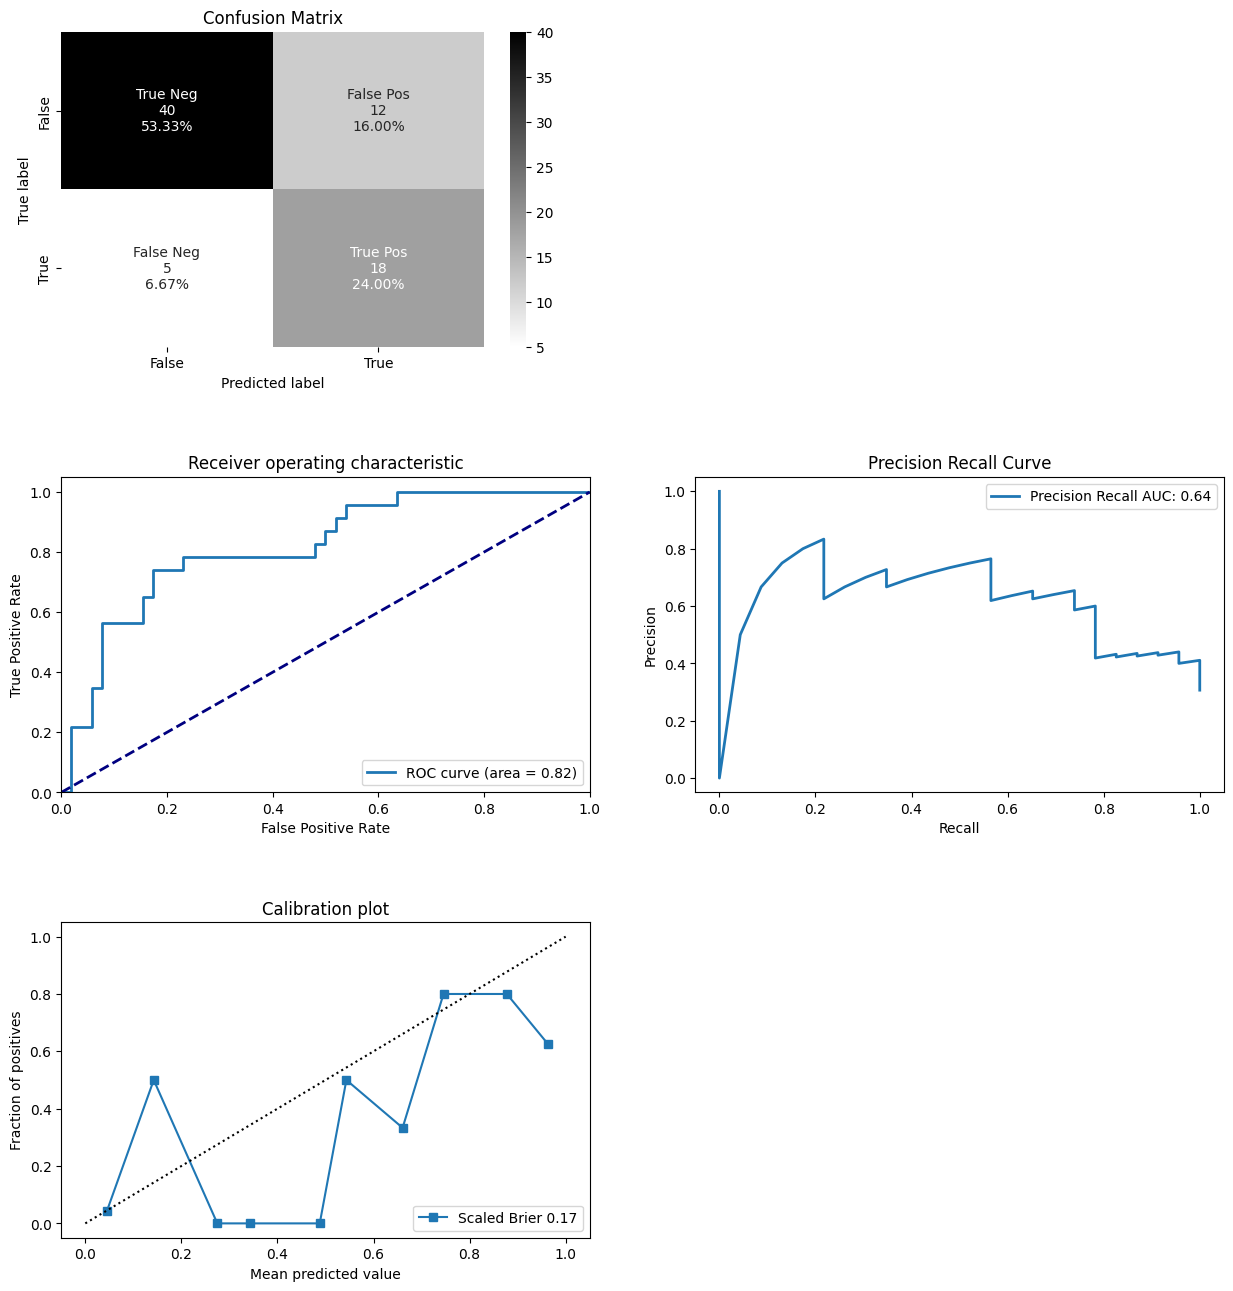

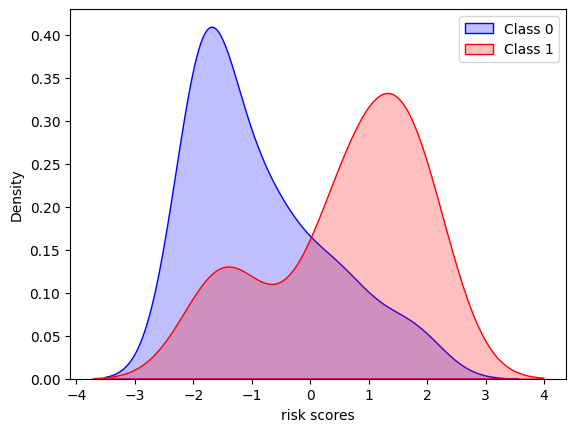

,,
,,
Ground Truth Prevalence,. . .,0.307
Test set Prevalence,. . .,0.400
True positive rate (recall),. . .,0.783
False positive rate,. . .,0.231
Positive predictive value (precision),. . .,0.600
True negative rate (specificity),. . .,0.769
False negative rate,. . .,0.217
Negative predictive value,. . .,0.889
Positive likelihood ratio (bigger is better),. . .,3.391


In [1102]:
import MLFlow_Utils
binary_classification_metrics(y_test, preds["Label"], preds["Score"])

### Understand best algorithm features and results
#### Run INTERPRETE_MODEL only for the best algorithm chosen in the previous lines

In [1103]:
#evaluate_model(cattuned)

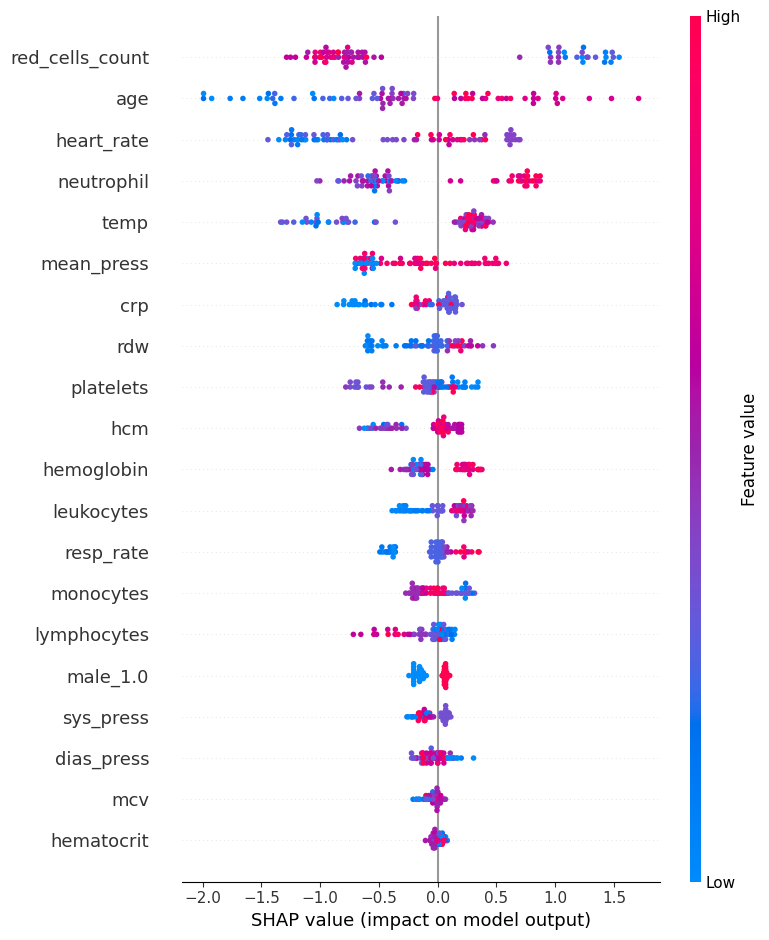

In [1104]:
#interpret_model(cattuned)
#interpret_model(lgbmtuned)
interpret_model(xgbtuned)

In [1105]:
#plot_model(xgbtuned, plot='ktops')

### 2.3.1) Build a model with all data
#### Run FINALIZE MODEL only for the best algorithm chosen in the previous lines

In [1106]:
#final_model = finalize_model(cattuned)
#final_model = finalize_model(lgbmtuned)
final_model = finalize_model(xgbtuned)

In [1107]:
str(final_model.__class__.__name__)

'XGBClassifier'

In [1108]:
final_model_name = str(final_model.__class__.__name__) + '_same_region_vs_one_' \
                    + X_test_specific.region.iloc[0]  \
                    + '_' + X_test_specific.state.iloc[0]  \
                    + '_' + X_test_specific.city_hospital.iloc[0]
final_model_name

'XGBClassifier_same_region_vs_one_NORTE_AM_AMAZONAS_HUGV'

In [1109]:
save_model(final_model, final_model_name ,verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [1110]:
final_model
#final_model.get_all_params()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.8, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.145, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=175, n_jobs=-2,
              num_parallel_tree=None, random_state=42, ...)

# Use the saved model to predict on specific hospital
## SAME_REGION_VS_ONE is the name of this strategy

In [1111]:
import pickle
import joblib

#Carrego o modelo unico
print('loaded: ' + final_model_name)

same_region_vs_one_model_pkl = final_model_name + ".pkl"
prep_pipe_same_region_vs_one, same_region_vs_one_model = joblib.load(same_region_vs_one_model_pkl)

# AS DUAS LINHAS ABAIXO ESTAVAM COM O NOME DA ESTRATÉGIA 2 
# all_except_one_model_pkl = final_model_name + ".pkl"
# prep_pipe_all_except_one, all_except_one_model = joblib.load(all_except_one_model_pkl)

loaded: XGBClassifier_same_region_vs_one_NORTE_AM_AMAZONAS_HUGV


In [1112]:
same_region_vs_one_model.__class__.__name__

'XGBClassifier'

In [1113]:
x_test_specific_name

'X_test_NORTE_AM_AMAZONAS_HUGV.csv'

In [1114]:
#Carrego o X_test do modelo único
X_test_single = pd.read_csv(x_test_specific_name, delimiter=";",index_col=0)
X_test_single.shape

(15, 25)

In [1115]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state'],
      dtype='object')

In [1116]:
#Carrego o Y_test do modelo único
y_test_single = pd.read_csv(y_test_specific_name, delimiter=";",index_col=0)
y_test_single = y_test_single["icu"]
y_test_single.shape

(15,)

In [1117]:
pd.set_option('display.max_columns', None)
X_test_single.head()

,city_hospital,age,male,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,region,state
31,AMAZONAS_HUGV,66.000,0.000,89.000,28.000,130.000,69.000,89.313,37.500,11.160,296500.000,34.720,4.400,29.520,13.000,91.870,17060.000,14212.000,1023.000,124.000,0.000,1699.000,94.000,NORTE,AM
1,AMAZONAS_HUGV,61.000,1.000,86.000,18.000,172.000,75.000,107.301,34.800,11.600,110900.000,35.960,4.370,26.660,11.790,82.250,12710.000,12201.000,381.000,0.000,0.000,127.000,15.100,NORTE,AM
29,AMAZONAS_HUGV,75.000,0.000,82.000,24.000,128.000,80.000,95.984,36.400,12.010,198500.000,35.940,4.200,28.580,10.330,85.500,4270.000,3112.000,835.000,19.000,2.000,299.000,3.200,NORTE,AM
21,AMAZONAS_HUGV,66.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,11.750,453800.000,36.890,4.110,28.550,11.680,89.620,8242.000,5114.000,1534.000,53.000,198.000,1340.000,20.900,NORTE,AM
2,AMAZONAS_HUGV,28.000,1.000,80.000,30.000,117.000,56.000,76.313,37.400,6.400,237000.000,20.100,2.470,25.800,13.500,81.500,11400.000,9784.000,776.000,63.000,126.000,651.000,200.400,NORTE,AM


In [1118]:
X_test_single["class"] = y_test_single

In [1119]:
X_test_single = X_test_single.drop(['city_hospital'],axis=1)
X_test_single = X_test_single.drop(['region'],axis=1)
X_test_single = X_test_single.drop(['state'],axis=1)

In [1120]:
X_test_single_transformed = prep_pipe_same_region_vs_one.fit_transform(X_test_single)

# A LINHA ABAIXO ESTAVA COM O NOME DA ESTRATÉGIA 2
#X_test_single_transformed = prep_pipe_all_except_one.fit_transform(X_test_single)


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
male,Categorical
heart_rate,Categorical
resp_rate,Numeric
sys_press,Categorical
dias_press,Categorical
mean_press,Numeric
temp,Numeric
hemoglobin,Numeric
platelets,Categorical


In [1121]:
X_test_single_transformed = X_test_single_transformed.drop(['class'],axis=1)

In [1122]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [1123]:
#Show distinct columns
distinct_columns = X_test[X_test.columns.difference(X_test_single_transformed.columns)].columns.tolist()
distinct_columns

[]

In [1124]:
X_test_single_transformed.shape

(15, 22)

In [1125]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

### Add missing columns to some hospitals that didn't collect all columns
e.g. HC_USP (missing: red_cells_count and eosinophils)

In [1126]:
for column in distinct_columns:
    if(column=='male_0.0'):
        X_test_single_transformed['male_0.0'] = X_test_single_transformed['male_1.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_1.0', axis=1)
    else:
        X_test_single_transformed[column]=np.NaN

In [1127]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [1128]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

**Reorder columns**

In [1129]:
# X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)

In [1130]:
# Reorder columns
X_test_single_transformed = X_test_single_transformed[X_test.columns]
X_test_single_transformed.shape

(15, 22)

0.6136363636363636


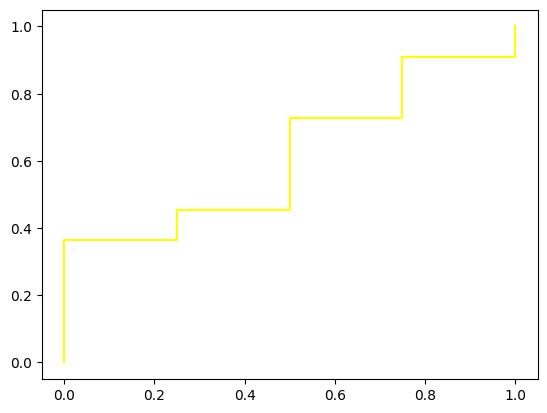

In [1131]:
#Vejo a curva ROC do modelo INDIVIDUAL e confirmo o valor da AUC
from sklearn.metrics import (roc_curve,auc)

y_pred_prob1 = same_region_vs_one_model.predict_proba(X_test_single_transformed)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_single, y_pred_prob1)

auc_ind = auc(fpr1, tpr1)
print(auc_ind)
plt.plot(fpr1, tpr1, label= "Single Model - best model - AUC " +  str(auc_ind), color="yellow")

In [1132]:
y_pred = same_region_vs_one_model.predict(X_test_single_transformed)

In [1133]:
y_test_single.value_counts()

icu
1    11
0     4
Name: count, dtype: int64

,,
,,
Ground Truth Prevalence,. . .,0.733
Test set Prevalence,. . .,0.333
True positive rate (recall),. . .,0.364
False positive rate,. . .,0.250
Positive predictive value (precision),. . .,0.800
True negative rate (specificity),. . .,0.750
False negative rate,. . .,0.636
Negative predictive value,. . .,0.300
Positive likelihood ratio (bigger is better),. . .,1.455


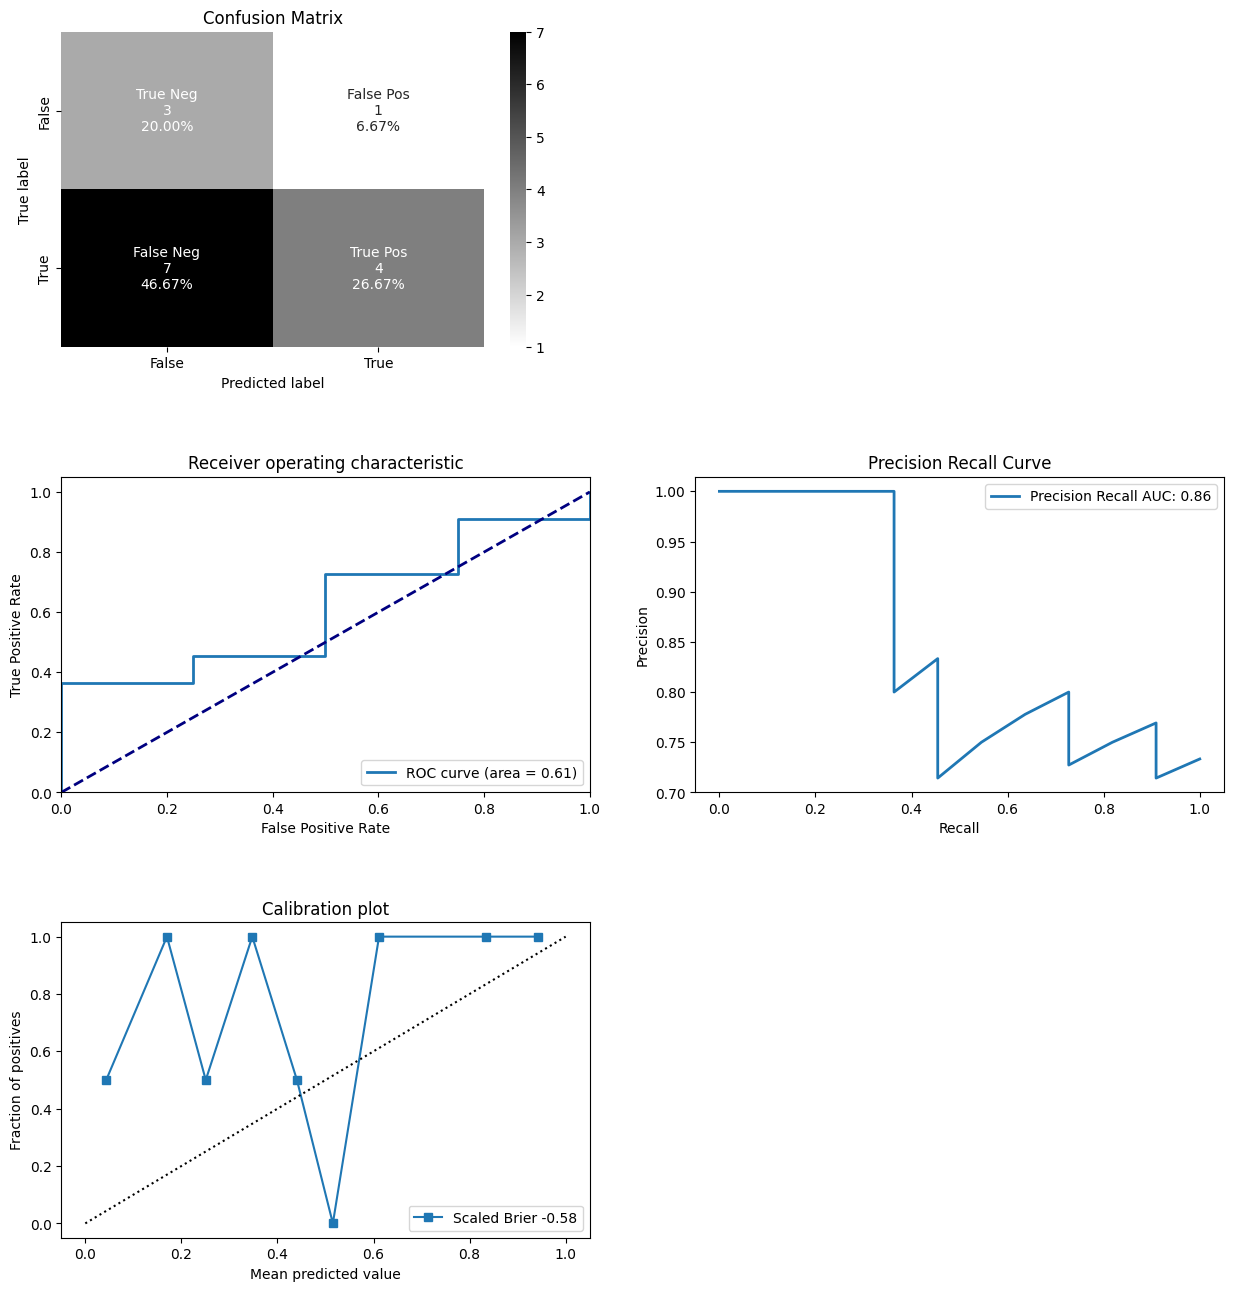

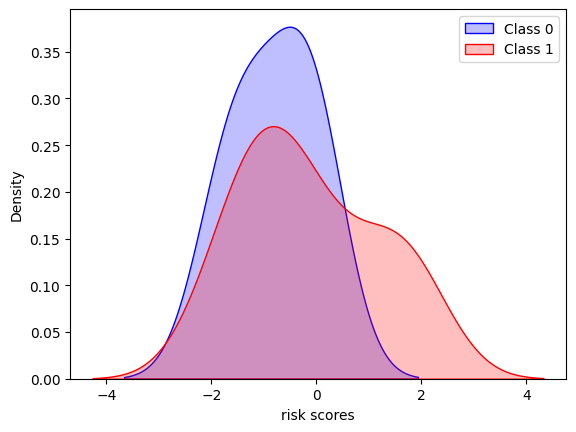

,,
,,
Ground Truth Prevalence,. . .,0.733
Test set Prevalence,. . .,0.333
True positive rate (recall),. . .,0.364
False positive rate,. . .,0.250
Positive predictive value (precision),. . .,0.800
True negative rate (specificity),. . .,0.750
False negative rate,. . .,0.636
Negative predictive value,. . .,0.300
Positive likelihood ratio (bigger is better),. . .,1.455


In [1134]:
import MLFlow_Utils
binary_classification_metrics(y_test_single, y_pred, pd.Series(y_pred_prob1))

In [1135]:
fprate, tprate, thresholds = roc_curve(y_test_single, y_pred_prob1, pos_label=1)
auc(fprate, tprate)

0.6136363636363636

In [1136]:
#ROC_AUC
["{0:0.2f}".format(i) for i in AUC_CI(y_test_single, y_pred_prob1)]

['0.29', '0.94']

In [1137]:
# y_test_single

In [1138]:
#recall
tpr(y_test_single, y_pred)

0.36363636363636365

In [1139]:
#specificidade
tnr(y_test_single, pd.Series(y_pred))

0.75

In [1140]:
#accuracy
accuracy(y_test_single, y_pred)

0.4666666666666667

In [1141]:
ppv(y_test_single, y_pred)

0.8

In [1142]:
npv(y_test_single, y_pred)

0.3

# End of File